# Models of Asset Dynamics

Chao Cheng | May 2019

There are two primary model types used to represent future price movements of assets: __binomial lattices__ and __Ito processes__. Binomial lattices are analytically simpler than Ito processes, and they provide an excellent basis for the computational work associated with investment problems. Ito processes are more realistic than binomial lattice models, however, and are fundamental to gaining a more complete understanding investment principles.

## 1. Binomial Lattice Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expected_growth_rate = 0.15
variance = 0.15

v = expected_growth_rate
sigma = np.sqrt(variance)
t = 1 / 52

def binomial_simulation(v, sigma, t, initial_price, periods):
    p = 0.5 + 0.5 * (v / sigma) * np.sqrt(t)
    u = np.exp(sigma * np.sqrt(t))
    d = 1 / u
    path = np.random.choice(2, size=100, p=[1 - p, p])
    
    stock_prices = [initial_price]
    current_price = initial_price
    for step in path:
        new_price = current_price * u if step == 1 else current_price * d
        stock_prices.append(new_price)
        current_price = new_price
    return stock_prices

stocks = pd.DataFrame({f"Stock {i}": binomial_simulation(v, sigma, t, 100, 100) for i in range(50)})

In [3]:
stocks.head()

,Stock 0,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5,Stock 6,Stock 7,Stock 8,Stock 9,...,Stock 40,Stock 41,Stock 42,Stock 43,Stock 44,Stock 45,Stock 46,Stock 47,Stock 48,Stock 49
0,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
1,105.517710,105.51771,105.51771,94.770821,94.770821,105.517710,105.517710,94.770821,105.51771,94.770821,...,94.770821,94.770821,105.517710,105.517710,105.51771,105.517710,94.770821,105.517710,94.770821,94.770821
2,100.000000,111.33987,100.00000,89.815086,100.000000,111.339870,111.339870,100.000000,100.00000,89.815086,...,89.815086,100.000000,100.000000,100.000000,111.33987,111.339870,89.815086,100.000000,89.815086,100.000000
3,94.770821,105.51771,105.51771,94.770821,105.517710,117.483281,117.483281,94.770821,105.51771,85.118495,...,85.118495,105.517710,94.770821,94.770821,105.51771,117.483281,94.770821,94.770821,94.770821,94.770821
4,100.000000,111.33987,111.33987,89.815086,100.000000,123.965667,111.339870,100.000000,100.00000,89.815086,...,89.815086,111.339870,89.815086,89.815086,111.33987,123.965667,89.815086,100.000000,100.000000,100.000000


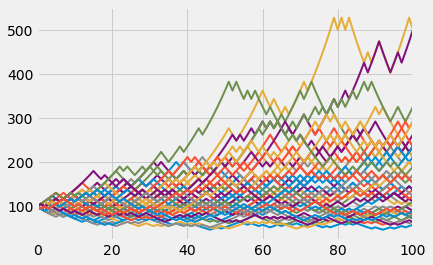

In [4]:
plt.style.use("fivethirtyeight")
stocks.plot(linewidth=2, legend=False)

## 2. Ito Process

Specifically, a geometric Brownian motion process.

In [5]:
expected_return = 0.15
variance = 0.15

v = expected_return
sigma = np.sqrt(variance)
t = 1 / 52

def ito_simulation(v, sigma, t, initial_price, periods):
    epsilons = np.random.normal(loc=0, scale=1, size=periods)
    
    stock_prices = [initial_price]
    current_price = initial_price
    for epsilon in epsilons:
        new_price = np.exp(v * t + sigma * epsilon * np.sqrt(t)) * current_price
        stock_prices.append(new_price)
        current_price = new_price
    return stock_prices

stocks = pd.DataFrame({f"Stock {i}": ito_simulation(v, sigma, t, 100, 100) for i in range(50)})

In [6]:
stocks.head()

,Stock 0,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5,Stock 6,Stock 7,Stock 8,Stock 9,...,Stock 40,Stock 41,Stock 42,Stock 43,Stock 44,Stock 45,Stock 46,Stock 47,Stock 48,Stock 49
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,106.275448,101.829227,102.359977,99.541287,104.987079,106.916556,85.817325,95.099778,106.092264,97.053414,...,100.426126,107.028781,106.971050,98.338718,102.186391,102.281577,105.068627,102.339794,111.693407,97.946120
2,95.941954,97.725656,117.478599,96.161209,104.735389,109.711733,86.338019,100.327326,103.882307,101.547621,...,96.652040,107.137773,107.981770,95.433345,99.813475,112.431282,103.482206,95.223829,121.153856,95.598804
3,94.750112,105.262855,113.130562,89.086227,110.616790,114.129931,86.168696,101.848579,103.625955,99.591913,...,97.620357,109.442304,102.763147,93.310764,100.994083,116.283956,105.620045,97.516119,121.238051,97.139537
4,91.438251,106.405685,106.712424,94.203630,114.605658,112.505857,94.443909,87.186664,100.112942,103.504633,...,91.503874,115.663514,96.895392,96.517779,96.305719,118.233557,103.522986,86.121686,118.440627,99.286276


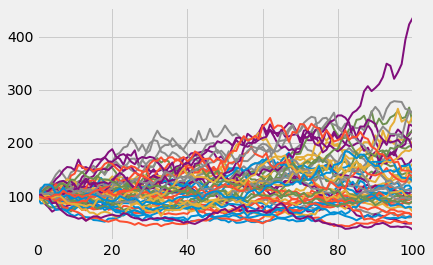

In [7]:
stocks.plot(linewidth=2, legend=False)